**Outlier 이상치**  
outlier란 일부 관측치의 값이 전체 데이터의 범위에서 크게 벗어난 아주 작거나 큰 극단적인 값을 갖는 것을 말한다.  
일반적으로 데이터의 모집단 평균이나 총합을 추정하는 것에 문제를 일으키며, 분산을 과도하게 증가시켜 분석이나 모델링의 정확도를 감소시키기 때문에 제거하는 것이 좋다.  
하지만 전체 데이터의 양이 많을수록 outlie 값이 통곗값에 미치는 영향력이 줄어들어 제거의 필요성이 낮아진다.그래도 실제 분석용 데이터에는 잘못 입력된 데이터 혹은 분석 모델의 정확도를 낮추는 이상치들이 많이 존재하는 경우가 대다수기 때문에 이상치 처리 단계를 거치고 분석 모델링에 들어가는 것이 좋다.

**Outlier 처리**  
outlier는 해당 값을 결측값으로 대체한 다음 결측값으로 처리하거나, 해당 이상치를 제거하는 **trimming** 방법을 하는 것이 간단하다.  
하지만 추정치의 분산은 감소하지만 실젯값을 과장하여 편향을 발생시킨다.

그래서 하한값과 상한값을 정해 하한값보다 작으면 하한값으로 대체하는 방법인 **Value Modification 관측값 변경**이나 이상치의 영향을 감소시키는 가중치를 주는 **Weight Modification 가중치 조정** 방법을 많이 사용한다.

**Outlier 확인 방법**  
outlier를 선정하는 가장 일반적인 방법은 boxplot 상에서 분류된 극단치를 그대로 선정하는 방법이 있고, 허용범위를 설정하여 이를 벗어나는 자료를 outlier로 정의하는 방법이 있다.  
보통 평균(중위수)로부터 +-3 표준편차 이상 떨어져 있는 값을 outlier로 보는데, 분포가 비대칭인 경우에는 -n과 +n 표준편차 값을 서로 다르게 설정하기도 한다.  
평균과 같은 통계량은 outlier에 민감하게 변하기 때문에 MAD(Median Absolute Deviation) 방법을 사용하는 것이 좀 더 효과적이다.  
  
하지만 통계치를 통한 outlier 탐색은 위험할 수 있다. 효과적인 outlier 탐색을 위해서는 해당 데이터 변수들의 의미와 비즈니스 도메인을 먼저 이해하고 이상치가 생긴 원인을 논리적으로 생각하여 데이터를 바라보아야 한다.  
(outlier를 변수화 하여 outlier에 대한 설명력 추가 - clustering)

또한 분석 도메인에 따라 이상치가 중요한 분석 요인이 될 수 있다.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease
df = pd.read_csv("../input/personal-key-indicators-of-heart-disease/2020/heart_2020_cleaned.csv")

In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
# BMI 컬럼의 분포 확인

df['BMI'].describe()

count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64

*평균값은 28.3이면서 최댓값은 94.8로 3배 이상차이나는 것을 확인*

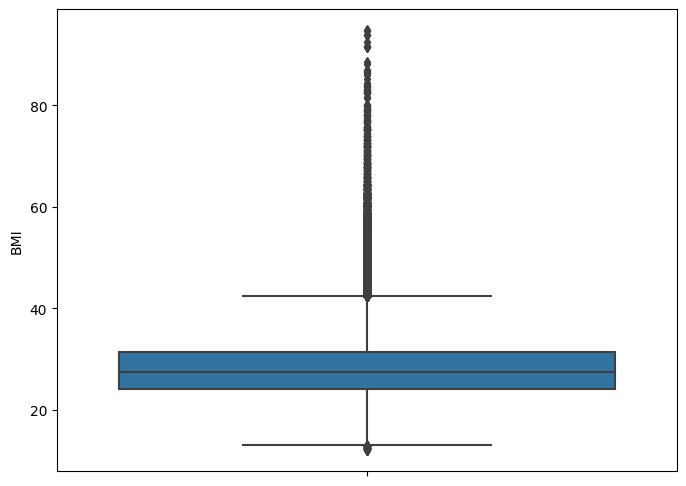

In [5]:
# BMI 컬럼의 박스플롯 시각화를 통한 이상치 확인

plt.figure(figsize = (8, 6))
sns.boxplot(y = 'BMI', data = df)
plt.show()

In [6]:
# BMI 컬럼의 이상치 제거 - IQR*3 기준으로

# Q1, Q3 범위 정의
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1    #IQR 범위. 
rev_range = 3  # 제거 범위 조절 변수 설정

# 이상치 범위 설정
filter = (df['BMI'] >= Q1 - rev_range * IQR) & (df['BMI'] <= Q3 + rev_range *IQR)
df_rmv = df.loc[filter]
print(df['BMI'].describe())
print(df_rmv['BMI'].describe())

count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64
count    318477.000000
mean         28.193173
std           6.010014
min          12.020000
25%          24.020000
50%          27.320000
75%          31.320000
max          53.590000
Name: BMI, dtype: float64


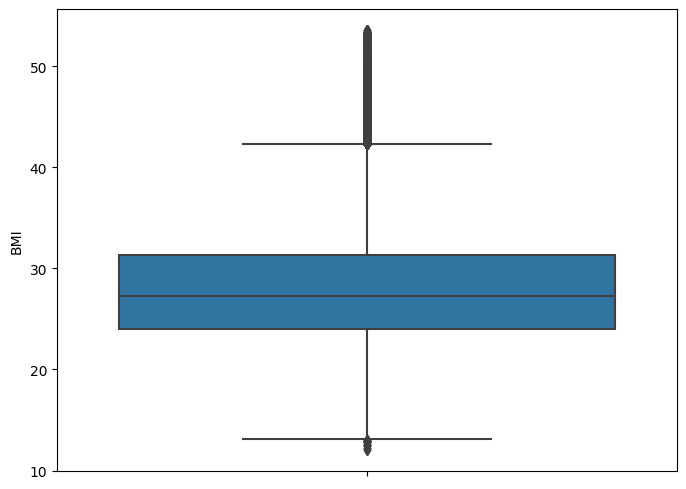

In [7]:
# 이상치 제거 후 박스플롯 시각화

plt.figure(figsize = (8, 6))
sns.boxplot(y = 'BMI', data = df_rmv)
plt.show()

In [8]:
# 이상치 IQR*3 값으로 대치

from tqdm import tqdm
tqdm.pandas()

# 이상치 대치 함수 설정
def replace_outlier(value):
    Q1 = df['BMI'].quantile(0.25)
    Q3 = df['BMI'].quantile(0.75)
    IQR = Q3 - Q1    #IQR 범위. 
    rev_range = 3  # 제거 범위 조절 변수 설정

    if ((value < (Q1 - rev_range * IQR))): 
        value = Q1 - rev_range * IQR
    if ((value > (Q3 + rev_range * IQR))): 
        value = Q3 + rev_range * IQR
#         value = df['BMI'].median() # 중앙값 대치
    return value
df['BMI'] = df['BMI'].progress_apply(replace_outlier)

print(df['BMI'].describe())

100%|██████████| 319795/319795 [52:09<00:00, 102.20it/s]

count    319795.000000
mean         28.297843
std           6.214399
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          53.590000
Name: BMI, dtype: float64


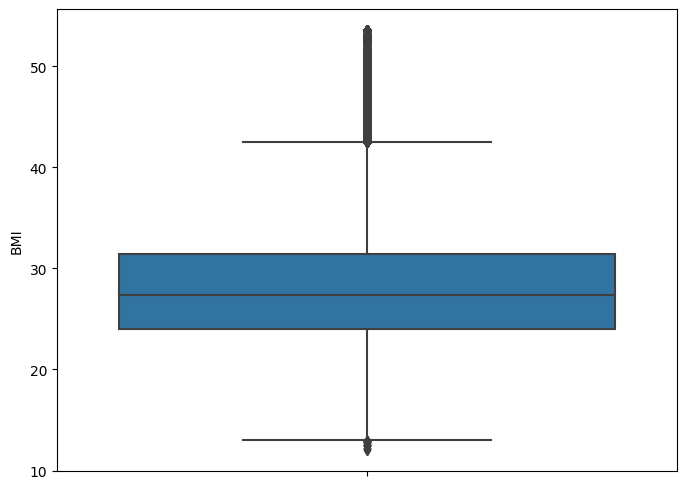

In [9]:
# 이상치 대치 후 박스플롯 시각화

plt.figure(figsize = (8, 6))
sns.boxplot(y = 'BMI', data = df)
plt.show()